<h3>Linear Interpolation for Steam Tables</h3>

* In today's class we're going to use both lists and arrays. 
* There is a subtle difference so be aware of it. 
* Lists differ from arrays in that arrays are treated as matrices and therefore matrix operations can be applied to them.

<h4>Single Linear Interpolation</h4>
* Linear interpolation is a way to fill in the missing data in tables. As an example, Let us consider two points on the p-h diagram for water below.
* <strong>Point 1 is at T = 111-degrees Celcius for and P = 0.01MPa</strong>. For this point we will do a single interpolation.
* Analysis of the compression cycle begins with an isentropic assumption. We note that Point 1 is very close to the entropy line equal to 8.5
* For an isentropic compression we follow the entropy line up until we reach a new pressure created the compression.
* <strong>Point 2 is at P= 0.02MPa and entropy is s=8.5</strong>

<img src="img/CL02-steam.png" style="width:785px;height:556px;" align="left">

<p style="color:#4799ff;">EXERCISE 2.1</p>
<p>Write a function to solve a single linear interpolation. This is simply</p>
<p>$$ y = y_i + \left(\frac{x - x_i}{x_f - x_i}\right)\times \left(y_f - y_i\right) $$</p>


In [3]:
def singleInt(x,x1,x2,y1,y2):
    xInc = (x - x1)/(x2 - x1)
    y = y1 + xInc*(y2 - y1)
    return(y) 

<p>Test your function using the data in the following table:<br>
Determine the:
* enthalpy, h and 
* entropy, s

at T = 120 degrees celcius, and print out its values on the screen</p>
<img src="img/satTable.png" style="width:305px;height:154px;" align="left">

In [2]:
hT120=singleInt(120,100,150,2687.5,2783)
print(hT120)

2725.7


<p style="color:#4799ff;">EXERCISE 2.2</p>
Now we understand how interpolation works, we can use a built-in function with the numpy function interp() <br>
We're also going to use list comprehension to create lists automatically. This is simply writing a mathematical function f(x). Say you want to rewrite the temperature list from 50 to 2000 incrementing by 50. The mathematical function is
$$f(x) = 50+50x \;\;\;\;\; \textrm{for } x[0,3]$$ 

* import the  numpy library as np
* create a list of temperature values using list comprehension
* convert the list to a numpy array by np.array
* create a np.array for enthalpy, and entropy by manually inputting the four values for each.
* use the numpy interp() function, which has the following syntax
* np.interp(x, xArray, yArray)
* e.g. np.interp(111, temperature, enthalpy) will interpolate both arrays but for the temperature value at T=111


In [5]:
import numpy as np 
tlist = [50 + 50*x for x in range(10)]  # create a List first
tarray = np.array(tlist) 

print(tlist)
print(tarray)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
[ 50 100 150 200 250 300 350 400 450 500]


In [7]:
# try to calculate
tlist/2.0

#error? #delete that and try this
tarray/2.0

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [8]:
import numpy as np
temperature = [50+50*x for x in range(4)]

# here we convert the list to a numpy array --> turns a list into a 1D matrix 
temperature = np.array(temperature)
enthalpy = np.array([2592, 2687.5, 2783, 2879.6])
entropy = np.array([8.1741, 8.4489, 8.6893, 8.9049])

# now we use the numpy function interp ===> np.interp(value at x, xArray, yArray)
np.interp(111, temperature, enthalpy)

2708.51

<p style="color:#4799ff;">EXERCISE 2.3</p>
We can plot two variables simply by importing the plotting library with the command:
    
<pre> import matplotlib.pyplot as plt</pre>

To plot the syntax is:
<pre>
plt.plot(temperature, enthalpy)
</pre>

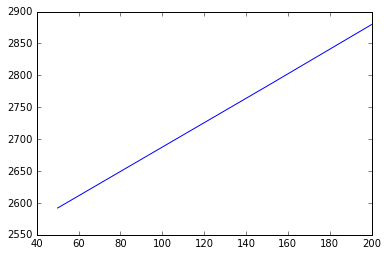

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(temperature, enthalpy)  #plt.plot(x,y);

We're going to do this using numpy library so you can choose whichever is easiest and best for you

<h4>Double Linear Interpolation</h4>
After isentropic compression we find that the new point is at P = 0.02MPa and s = 8.5 (Point 2)

Superheated steam tables are given in blocks defined by pressure. For example take a look at <br>
http://www.cfdresearch.com/miet2039/thermoTables.php <br>
and look at the superheated section (tables suffixed with SH) and shown belo <br>
<p><img src="img/CL02-doubleInt.png" style="width:570px;height:242px;" align="left"></p>
 <br clear="all"/>


<p style="color:#4799ff;">EXERCISE 2.4</p>
<p>We need to find what our new temperature and enthalpy will be after the superheated steam has been compressed to P=0.02MPa. The table above shows that it lies somewhere in between T=100 to T=300 for the pressure values of P=0.01MPa to P=0.05MPa. Therefore we'll need to collect the temperature and enthalpy values that form a block/rectangle around the entropy and pressure point of P=0.02MPa and s=8.5
</p>

* create numpy arrays for the temperature range, h and s at P=0.01MPa, and h and s at P=0.05MPa
* create an array for the pressure values to interpolate between e.g. P = 0.01MPa, P = 0.02MPa, P = 0.05MPa
* create the calculations and use np.interp() to solve for temperature and enthalpy at P=0.02MPa

* plot temperature (y-axis) vs entropy (x-axis)

* plot enthalpy (y-axis) vs entropy (x-axis)

* if you have time you can convert it into a function

[ 2686.225  2782.25   2879.15   2977.175  3076.475]
[ 8.2605     8.4645225  8.718475   8.915325   9.0967   ]


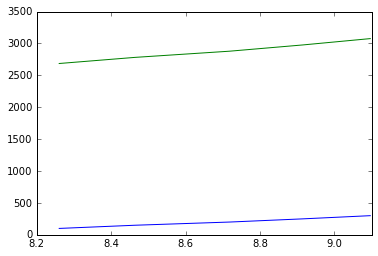

In [11]:
tempRange = np.array([100, 150, 200, 250, 300])

hAtP001 = np.array([2687.5, 2783, 2879.6, 2977.5, 3076.7])
sAtP001 = np.array([8.4489, 8.63893, 8.9049, 9.1015, 9.2827])

hAtP005 = np.array([2682.4, 2780., 2877.8, 2976.2, 3075.8])
sAtP005 = np.array([7.6953, 7.9413, 8.1592, 8.3568, 8.5387])

pressure = [0.01, 0.02, 0.05] #MPa

# Array calculation
pressInc = (pressure[1]-pressure[0])/(pressure[2]-pressure[0])
hReqPress = hAtP001 + (hAtP005 - hAtP001)* pressInc
sReqPress = sAtP001 + (sAtP005 - sAtP001)*pressInc
print(hReqPress)
print(sReqPress)

#our independent variable e.g. x is the entropy, so we can now use np.interp
np.interp(8.5, sReqPress, tempRange)
np.interp(8.5, sReqPress, hReqPress)

plt.plot(sReqPress, tempRange)
plt.plot(sReqPress, hReqPress)